In [ ]:
pip install scikeras

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from collections import Counter
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


def categorical_to_numpy(labels_in):
  labels = []
  for label in labels_in:
    if label == 'dog':
      labels.append(np.array([1, 0]))
    else:
      labels.append(np.array([0, 1]))
  return np.array(labels)

def display_image(data, labels, img_idx):
  from google.colab.patches import cv2_imshow
  import cv2
  import matplotlib.pyplot as plt
  my_img   = data[img_idx, :].squeeze().reshape([32,32,3]).copy()
  my_label = labels[img_idx]
  print('label: %s'%my_label)
  fig, ax = plt.subplots(1,1)

  img = ax.imshow(my_img.astype('uint8'), extent=[-32,32,-32,32])



  fig.show(img)

def CNNClassifier(num_epochs=30, layers=4, dropout=0.5):
  def create_model():
    model = Sequential()
    model.add(keras.layers.Reshape((32, 32, 3),input_shape=(3072,)))
    model.add(Conv2D(32,(3,3)))
    for i in range(layers):
      model.add(Conv2D(32, (3, 3), padding='same'))
      model.add(Activation('relu'))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    # initiate RMSprop optimizer
    opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)

    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model
  return KerasClassifier(build_fn=create_model, epochs=num_epochs, batch_size=10, verbose=2)



In [ ]:
df = pd.read_csv("conscientious_cars.csv")
data = df.drop('3072',axis='columns')
labels = df['3072'].transpose()
data = data.to_numpy().transpose()[1:].transpose()
# labels = df.values.tolist()[-1]
labels = labels.values.tolist()

label: dog


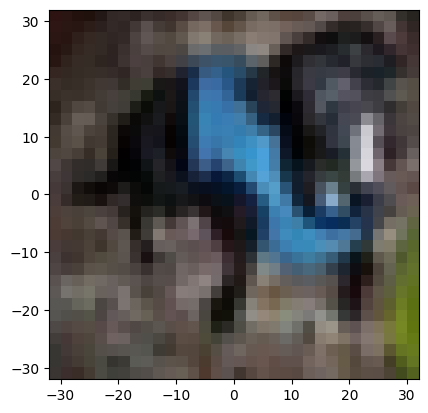

In [ ]:
display_image(data,labels,0)
# data
# labels

label: dog
label: dog
label: road
label: road


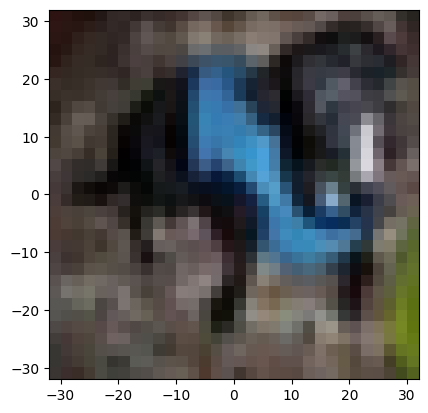

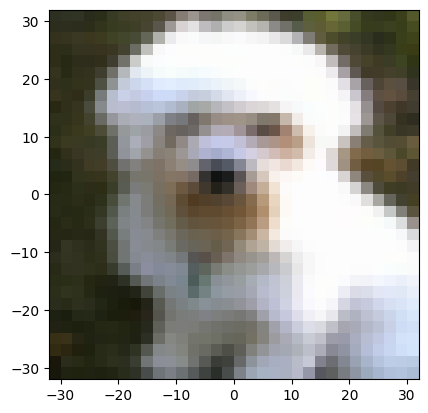

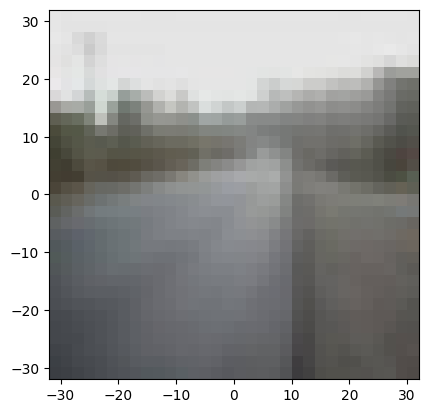

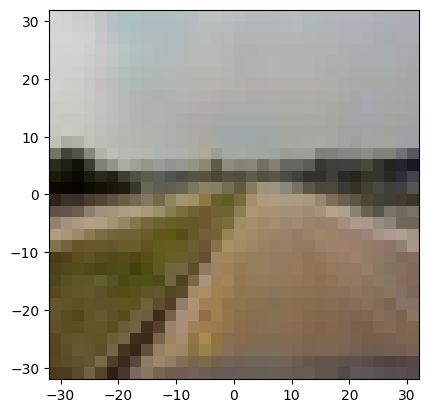

In [ ]:
for i in range(0,1200,300):
  display_image(data,labels,i)

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, labels, test_size=0.2, random_state=1)


# Initialize our model
knn_model = KNeighborsClassifier(n_neighbors=20) # Change this!

# # Train our model
knn_model.fit(X_train, y_train)
# # Test our model
y_pred = knn_model.predict(X_test)
# # Print the score on the testing data
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.825


In [ ]:
for i in range(0,1200,300):
  print("Prediction: " + knn_model.predict([data[i]])[0] + ", Actual: " + labels[i])



Prediction: dog, Actual: dog
Prediction: dog, Actual: dog
Prediction: road, Actual: road
Prediction: road, Actual: road


In [ ]:
#TP, FP, TN, FN
tp_count = 0
tn_count = 0
fp_count = 0
fn_count = 0
for  i in range(len(X_test)):
  y_pred = knn_model.predict([X_test[i]])[0]
  if (y_pred==y_test[i] and y_pred=='dog'):
    tp_count+=1
  elif (y_pred==y_test[i] and y_pred=='road'):
    tn_count+=1
  elif (y_pred!=y_test[i] and y_pred=='dog'):
    fp_count+=1
  else :
    fn_count+=1
print("True Positives: " + str(tp_count))
print("True Negatives: " + str(tn_count))
print("False Positives: " + str(fp_count))
print("False Negatives: " + str(fn_count))

True Positives: 86
True Negatives: 112
False Positives: 1
False Negatives: 41


In [ ]:
#Neural Network implementation
nnet = MLPClassifier(hidden_layer_sizes=(50, 50, 50, 50), random_state=1, max_iter=10000)  ## How many hidden layers? How many neurons does this have?
nnet.fit(X_train, y_train)

predictions = nnet.predict(X_test)

print("MLP Testing Accuracy:")
print(accuracy_score(y_test, predictions))

MLP Testing Accuracy:
0.9041666666666667


In [ ]:
#CNN implementation
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = categorical_to_numpy(y_train)
y_test = categorical_to_numpy(y_test)
cnn = CNNClassifier(5)
# print('here')
cnn.fit(X_train, y_train)
y_pred = cnn.predict(X_test)

print(accuracy_score(y_test, y_pred))


Epoch 1/5
96/96 - 13s - loss: 1.1705 - accuracy: 0.6469 - 13s/epoch - 132ms/step
Epoch 2/5
96/96 - 10s - loss: 0.4818 - accuracy: 0.8000 - 10s/epoch - 104ms/step
Epoch 3/5
96/96 - 11s - loss: 0.3305 - accuracy: 0.8802 - 11s/epoch - 110ms/step
Epoch 4/5
96/96 - 11s - loss: 0.3117 - accuracy: 0.8771 - 11s/epoch - 111ms/step
Epoch 5/5
96/96 - 11s - loss: 0.2662 - accuracy: 0.8906 - 11s/epoch - 111ms/step
24/24 - 1s - 707ms/epoch - 29ms/step
0.9291666666666667
